<a href="https://colab.research.google.com/github/1004516/SE-ALES-Y-SISTEMAS/blob/main/EJERCICIOS%20TALLER%202/Simulacion%20Punto%202%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x[n]: [-15.   5.  -3.   0.   5.   7.  -1.]
h[n]: [ 1. -2.  0.  1. -2.]
y[n] = x*h: [-15.  35. -13.  -9.  40. -16.  -9.   7.  -3. -15.   2.]

Respuesta al escalón s[n]: [ -1.   6. -10.   3.   1. -10.   2.   5.]
h2[n] = s[n] - s[n-1]: [ -1.   7. -16.  13.  -2. -11.  12.   3.]
y2[n] = x*h2: [  15. -110.  278. -296.  138.  144. -259.   -6.   76.  -91.  -15.  110.
    9.   -3.]


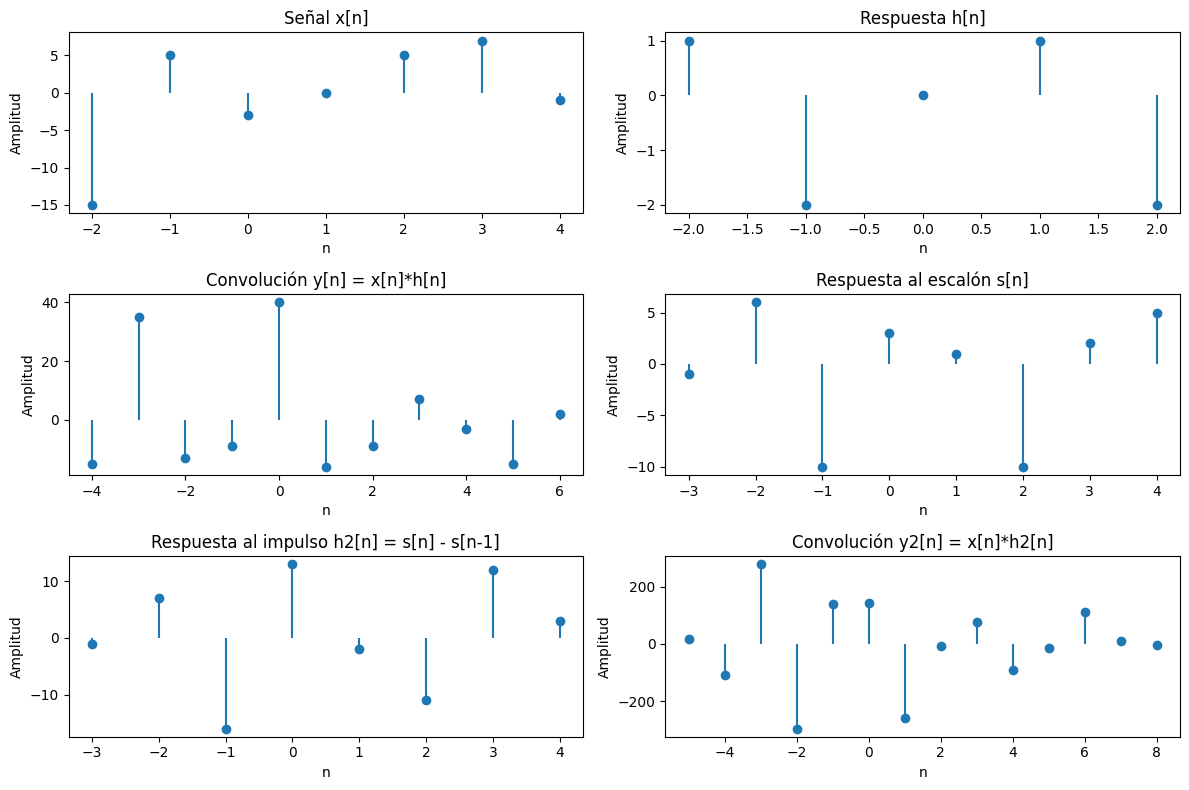

In [21]:
# --- SIMULACIÓN PUNTO 2.4 ---
# Descripción: Cálculo de convoluciones y[n] = x[n]*h[n] y y2[n] = x[n]*h2[n]
# con graficación y validación numérica

import numpy as np
import matplotlib.pyplot as plt

# === Datos de entrada ===
x = np.array([-15, 5, -3, 0, 5, 7, -1], dtype=float)
nx0 = 2                     # posición donde n=0
nx = np.arange(-nx0, -nx0 + len(x))   # índices de x[n]

h = np.array([1, -2, 0, 1, -2], dtype=float)
nh0 = 2
nh = np.arange(-nh0, -nh0 + len(h))

# --- Convolución directa y[n] = x[n]*h[n] ---
y = np.convolve(x, h)
ny = np.arange(nx[0] + nh[0], nx[-1] + nh[-1] + 1)

# === Segunda parte ===
# Respuesta al escalón s[n]
s = np.array([-1, 6, -10, 3, 1, -10, 2, 5], dtype=float)
ns0 = 3
ns = np.arange(-ns0, -ns0 + len(s))

# Respuesta al impulso h2[n] = s[n] - s[n-1]
h2 = np.zeros_like(s)
for i in range(len(s)):
    prev = s[i-1] if i-1 >= 0 else 0
    h2[i] = s[i] - prev
nh2 = ns.copy()

# Convolución con h2[n]
y2 = np.convolve(x, h2)
ny2 = np.arange(nx[0] + nh2[0], nx[-1] + nh2[-1] + 1)

# === Impresión de resultados numéricos ===
print("x[n]:", x)
print("h[n]:", h)
print("y[n] = x*h:", y)
print("\nRespuesta al escalón s[n]:", s)
print("h2[n] = s[n] - s[n-1]:", h2)
print("y2[n] = x*h2:", y2)

# === Gráficas ===
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
plt.stem(nx, x, basefmt=" ")
plt.title("Señal x[n]")
plt.xlabel("n"); plt.ylabel("Amplitud")

plt.subplot(3,2,2)
plt.stem(nh, h, basefmt=" ")
plt.title("Respuesta h[n]")
plt.xlabel("n"); plt.ylabel("Amplitud")

plt.subplot(3,2,3)
plt.stem(ny, y, basefmt=" ")
plt.title("Convolución y[n] = x[n]*h[n]")
plt.xlabel("n"); plt.ylabel("Amplitud")

plt.subplot(3,2,4)
plt.stem(ns, s, basefmt=" ")
plt.title("Respuesta al escalón s[n]")
plt.xlabel("n"); plt.ylabel("Amplitud")

plt.subplot(3,2,5)
plt.stem(nh2, h2, basefmt=" ")
plt.title("Respuesta al impulso h2[n] = s[n] - s[n-1]")
plt.xlabel("n"); plt.ylabel("Amplitud")

plt.subplot(3,2,6)
plt.stem(ny2, y2, basefmt=" ")
plt.title("Convolución y2[n] = x[n]*h2[n]")
plt.xlabel("n"); plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()